# CLASSIFICATION OF S&P500 STOCKS

## 1. RETURNING THE S&P500 YAHOO DATASET

###  CALCULATING THE N-DAY RETURNS

The problem consists on looking at the n-day return of a given stock and looking at such return as a function of a large set of surrounding variables.
We are creating a data set for this stock.
We have the price of all stocks in the set and the returns corresponding for this stock

In [1]:
from collections import Counter
import numpy as np
import pandas as pd
import pickle


### GATHERING THE DATA

In [2]:
# The purpose is to lable data. This will look for attributes.
# Each company will look at the attributes of all the other companies in the index

def process_data_for_labels(ticker):
    hm_days=7
    df=pd.read_csv('sp500_joined_closes.csv', index_col=0)
    #This command takes the names of the companies and makes a list
    tickers=df.columns.values.tolist()
    # Now, to deal with NaN, we can fill the numbers with zeros
    df.fillna(0, inplace=True)
    
    for i in range(1, hm_days+1):
        # note that the format refers tp put in the first brackets the ticker and the second the value of i
        df['{}_{}d'.format(ticker, i)]=(df[ticker].shift(-i)-df[ticker])/df[ticker]
        
    df.fillna(0,inplace=True)    
    return df, tickers
    

## 2. THE MAPPING FUNCTION

In [3]:
from collections import Counter
import numpy as np
import pandas as pd
import pickle

In [4]:
def process_data_for_labels(ticker):
    hm_days=7
    df=pd.read_csv('sp500_joined_closes.csv', index_col=0)
    #This command takes the names of the companies and makes a list
    tickers=df.columns.values.tolist()
    # Now, to deal with NaN, we can fill the numbers with zeros
    df.fillna(0, inplace=True)
    
    for i in range(1, hm_days+1):
        # note that the format refers tp put in the first brackets the ticker and the second the value of i
        df['{}_{}d'.format(ticker, i)]=(df[ticker].shift(-i)-df[ticker])/df[ticker]
        
    df.fillna(0,inplace=True)    
    return tickers, df

In [5]:
# We define the function that is goung to be mapped (applied) to the data frame
def buy_sell_hold(*args):
    cols=[c for c in args]
    requirement=0.02
    # The following structure takes all elements in args and if any of them is larger than requirement,
    for col in cols:
        if col>requirement:
            return 1
        if col<requirement:
            return -1
    return 0
        

In [6]:
# We will create a data series that defines the action to be taken for each security at any given time

def extract_featuresets(ticker):
    tickers, df=process_data_for_labels(ticker)
    df['{}_target'.format(ticker)]=list(map(buy_sell_hold,                                     
                                        df['{}_1d'.format(ticker)],
                                        df['{}_2d'.format(ticker)], 
                                        df['{}_3d'.format(ticker)],  
                                        df['{}_4d'.format(ticker)], 
                                        df['{}_5d'.format(ticker)],
                                        df['{}_6d'.format(ticker)], 
                                        df['{}_7d'.format(ticker)]))
    
    vals=df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    # We will require to get information on the buy sell
    # The Counter looks for classes and determines the number of occurences of each state
    print('Data spread:', Counter(str_vals))
    
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    
    df_vals=df[[ticker for ticker in tickers]].pct_change()
    df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)
    
    # We will create the feature set
    X=df_vals.values
    y=df['{}_target'.format(ticker)].values
    
    return X,y,df

## 3. THE CLASSIFICATION PROBLEM

Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines.

The problem that we will try to address is to se a variable that takes potentially three values. Buy, Sell or Hold.

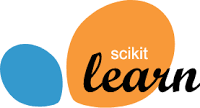

In [7]:
from sklearn import svm, cross_validation, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

D:\Program Files\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Program Files\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


We will go for the simple syntaxis of a Machine Learning module.

**The Method used for the classification will be the Nearest Neighbor**

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

scikit-learn implements two different nearest neighbors classifiers: KNeighborsClassifier implements learning based on the  nearest neighbors of each query point, where  is an integer value specified by the user. RadiusNeighborsClassifier implements learning based on the number of neighbors within a fixed radius  of each training point, where  is a floating-point value specified by the user.

The -neighbors classification in KNeighborsClassifier is the most commonly used technique. The optimal choice of the value  is highly data-dependent: in general a larger  suppresses the effects of noise, but makes the classification boundaries less distinct.

In cases where the data is not uniformly sampled, radius-based neighbors classification in RadiusNeighborsClassifier can be a better choice. The user specifies a fixed radius , such that points in sparser neighborhoods use fewer nearest neighbors for the classification. For high-dimensional parameter spaces, this method becomes less effective due to the so-called “curse of dimensionality”.

The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns uniform weights to each neighbor. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied to compute the weights.

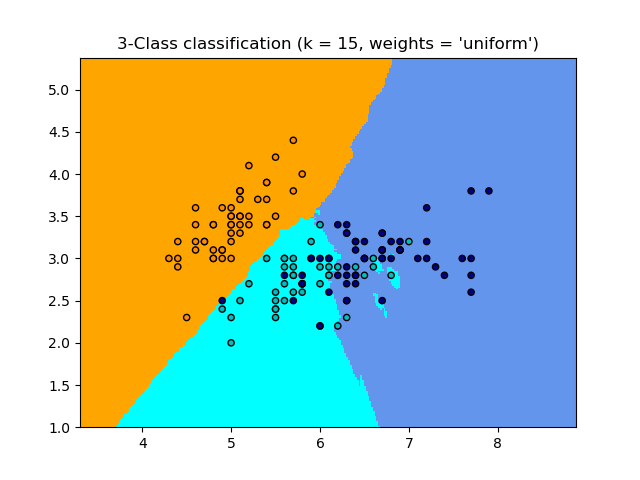

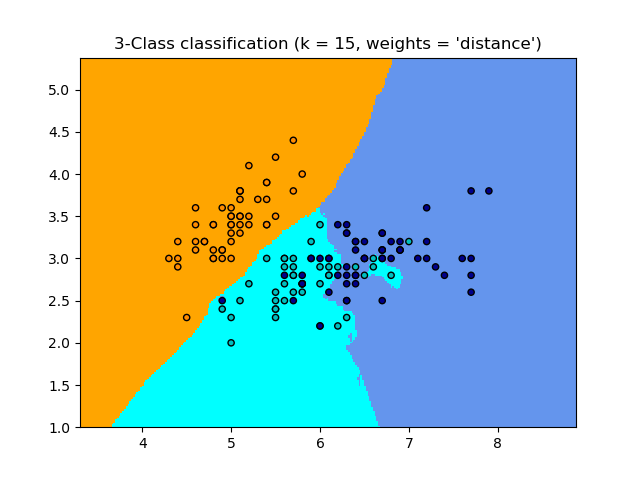

Neighbors-based regression can be used in cases where the data labels are continuous rather than discrete variables. The label assigned to a query point is computed based on the mean of the labels of its nearest neighbors.

scikit-learn implements two different neighbors regressors: KNeighborsRegressor implements learning based on the  nearest neighbors of each query point, where  is an integer value specified by the user. RadiusNeighborsRegressor implements learning based on the neighbors within a fixed radius  of the query point, where  is a floating-point value specified by the user.

The basic nearest neighbors regression uses uniform weights: that is, each point in the local neighborhood contributes uniformly to the classification of a query point. Under some circumstances, it can be advantageous to weight points such that nearby points contribute more to the regression than faraway points. This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns equal weights to all points. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied, which will be used to compute the weights.

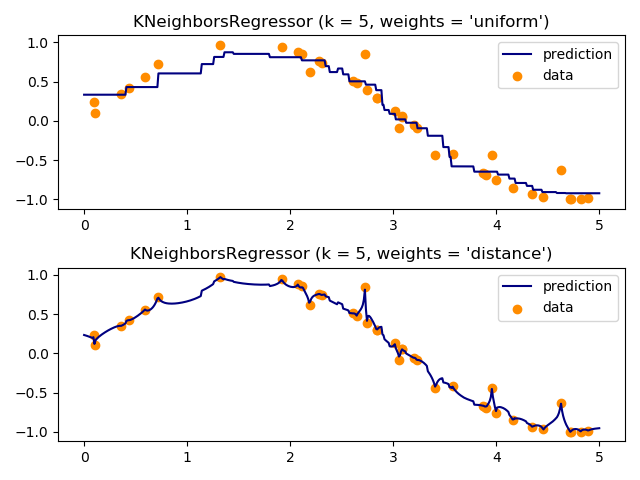

### THE K-NEIGHBOR CLASSIFIER

In [8]:
from collections import Counter
import numpy as np
import pandas as pd
import pickle
from sklearn import svm, cross_validation, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier


def process_data_for_labels(ticker):
    hm_days=7
    df=pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers=df.columns.values.tolist()
    df.fillna(0, inplace=True)
    
    for i in range(1, hm_days+1):
        df['{}_{}d'.format(ticker, i)]=(df[ticker].shift(-i)-df[ticker])/df[ticker]
        
    df.fillna(0,inplace=True)    
    return tickers, df


def buy_sell_hold(*args):
    cols=[c for c in args]
    requirement=0.02
    for col in cols:
        if col>requirement:
            return 1
        if col<-requirement:
            return -1
    else:
        return 0

def extract_featuresets(ticker):
    tickers, df=process_data_for_labels(ticker)
    df['{}_target'.format(ticker)]=list(map(buy_sell_hold,                                     
                                        df['{}_1d'.format(ticker)],
                                        df['{}_2d'.format(ticker)], 
                                        df['{}_3d'.format(ticker)],  
                                        df['{}_4d'.format(ticker)], 
                                        df['{}_5d'.format(ticker)],
                                        df['{}_6d'.format(ticker)], 
                                        df['{}_7d'.format(ticker)]))
    
    vals=df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))
    
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    #df.dropna(inplace=True)
    df.fillna(0, inplace=True)
    
    df_vals=df[[ticker for ticker in tickers]].pct_change()
    df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)
    
    X=df_vals.values
    y=df['{}_target'.format(ticker)].values
    
    return X,y,df

In [9]:
def do_ml(ticker):
    X,y,df = extract_featuresets(ticker)
    # Split arrays or matrices into random train and test subsets
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.75)
    X_train= np.clip(X_train, -0.10, 0.10)
    X_test= np.clip(X_test,-0.10,0.10)
    
    
    np.savetxt("X_train.csv", X_train, delimiter=",")
    np.savetxt("y_train.csv", y_train, delimiter=",")
    np.savetxt("X_test.csv", X_test, delimiter=",")
    np.savetxt("y_test.csv", y_test, delimiter=",")
    
    clf=neighbors.KNeighborsClassifier()
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('Accuracy', confidence)
    prediction = clf.predict(X_test)
    print('Predicted Spread ', Counter(prediction))
    
    return confidence

In [10]:
do_ml('REG')

Data spread: Counter({'1': 2092, '-1': 1532, '0': 1155})
Accuracy 0.34365411436541143
Predicted Spread  Counter({1: 1428, 0: 1329, -1: 828})


0.34365411436541143

### THE VOTING CLASSIFIER

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

Effective in high dimensional spaces.

Still effective in cases where number of dimensions is greater than the number of samples.

Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

The support vector machines in scikit-learn support both dense (numpy.ndarray and convertible to that by numpy.asarray) and sparse (any scipy.sparse) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered numpy.ndarray (dense) or scipy.sparse.csr_matrix (sparse) with dtype=float64.

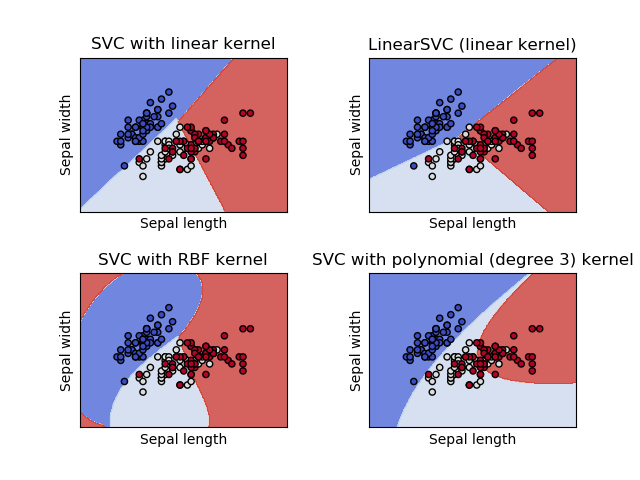

Note that the LinearSVC also implements an alternative multi-class strategy, the so-called multi-class SVM formulated by Crammer and Singer, by using the option multi_class='crammer_singer'. This method is consistent, which is not true for one-vs-rest classification. In practice, one-vs-rest classification is usually preferred, since the results are mostly similar, but the runtime is significantly less.

For “one-vs-rest” LinearSVC the attributes coef_ and intercept_ have the shape [n_class, n_features] and [n_class] respectively. Each row of the coefficients corresponds to one of the n_class many “one-vs-rest” classifiers and similar for the intercepts, in the order of the “one” class.

In the case of “one-vs-one” SVC, the layout of the attributes is a little more involved. In the case of having a linear kernel, the attributes coef_ and intercept_ have the shape [n_class * (n_class - 1) / 2, n_features] and [n_class * (n_class - 1) / 2] respectively. This is similar to the layout for LinearSVC described above, with each row now corresponding to a binary classifier. The order for classes 0 to n is “0 vs 1”, “0 vs 2” , … “0 vs n”, “1 vs 2”, “1 vs 3”, “1 vs n”, . . . “n-1 vs n”.

The shape of dual_coef_ is [n_class-1, n_SV] with a somewhat hard to grasp layout. The columns correspond to the support vectors involved in any of the n_class * (n_class - 1) / 2 “one-vs-one” classifiers. Each of the support vectors is used in n_class - 1 classifiers. The n_class - 1 entries in each row correspond to the dual coefficients for these classifiers.

In [17]:
def do_ml(ticker):
    X,y,df = extract_featuresets(ticker)
    
    
    # STEP 1. PREPARATION OF THE DATA SETS
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.25)
    X_train= np.clip(X_train, -0.10, 0.10)
    X_test= np.clip(X_test,-0.10,0.10)
    
    # STEP 2. DEFINITION OF THE MODEL TO BE USED
    clf= VotingClassifier([('lsvc', svm.LinearSVC()),
                           ('knn', neighbors.KNeighborsClassifier()),
                           ('rfor', RandomForestClassifier())])
    
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('Accuracy', confidence)
    prediction = clf.predict(X_test)
    print('Predicted Spread ', Counter(prediction))
    
    return confidence, prediction, y_test

In [19]:
confidence, prediction, y_test = do_ml("REG")

Data spread: Counter({'1': 2092, '-1': 1532, '0': 1155})


D:\Program Files\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy 0.3907949790794979
Predicted Spread  Counter({1: 819, -1: 305, 0: 71})


D:\Program Files\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


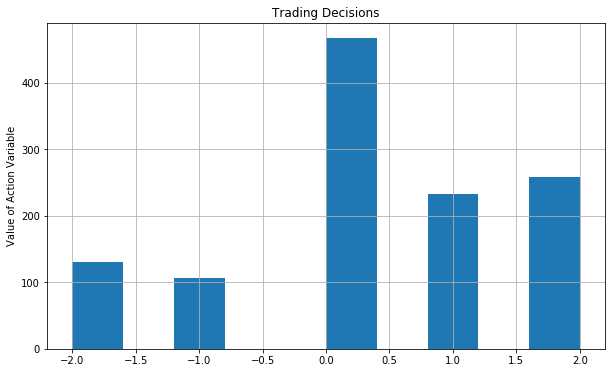

In [52]:
plt.rcParams['figure.figsize']=(10,6)

import matplotlib.pyplot as plt
predicted_values=np.array(prediction)
y_values=np.array(y_test)
failed_trade=np.subtract(prediction, y_test)
plt.hist(failed_trade)
plt.ylabel('Value of Action Variable')
plt.title('Trading Decisions')

plt.grid(True)
plt.show()

In [53]:
ft = pd.DataFrame(failed_trade)

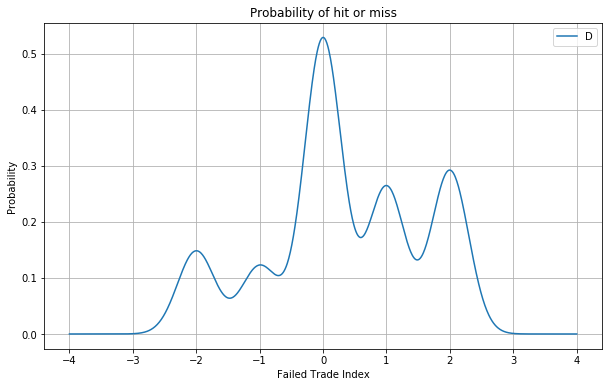

In [57]:
fig=ft.plot.kde()
fig.set_xlabel('Failed Trade Index')
fig.set_ylabel('Probability')
plt.title("Probability of hit or miss")
plt.grid(True)
fig.legend('D')
plt.show()